<h2><B>PROBLEM STATEMENT :-
<BR><H1>Predicting the Risk of Cardiovascular Disease Using Supervised Learning Techniques.

<h2><b>SUBMITTED BY :-<br>
<h3>
RISHIKA - 15901172024 <small>( IGDTUW )</small><br>
SHREYA MAURYA - 18901172024    <small>( IGDTUW )


In [ ]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# mounting the drive and uploading the dataset

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1><B>Importing the Dataset

In [ ]:
# importing the dataset and convert the csv file to a dataframe 'df'

df = pd.read_csv('/content/heart_disease_uci.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# print the first 5 rows of the dataframe 'df'

df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
# Extract the 'Cleveland' data from 'df' since it has the least number of null values, and updating the 'df' dataframe

df = df[df['dataset'] == 'Cleveland']

In [ ]:
# printing the shape of the dataframe(rows, columns)

df.shape

(304, 16)

In [ ]:
# info gives an overall insight about the dataframe -

# 1. Index Range – starting and ending row numbers.
# 2. Column Names – all the columns in the DataFrame.
# 3. Non-null Count – how many non-missing (NaN) values each column has.
# 4. Dtype – data type of each column (int64, float64, object, bool, datetime64, etc.).
# 5. Memory Usage – how much RAM the DataFrame takes.

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 0 to 303
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        304 non-null    int64  
 1   age       304 non-null    int64  
 2   sex       304 non-null    object 
 3   dataset   304 non-null    object 
 4   cp        304 non-null    object 
 5   trestbps  304 non-null    float64
 6   chol      304 non-null    float64
 7   fbs       304 non-null    object 
 8   restecg   304 non-null    object 
 9   thalch    304 non-null    float64
 10  exang     304 non-null    object 
 11  oldpeak   304 non-null    float64
 12  slope     303 non-null    object 
 13  ca        299 non-null    float64
 14  thal      301 non-null    object 
 15  num       304 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 40.4+ KB


In [ ]:
# The .describe() method generates summary statistics for numerical columns
# (count, mean, std, min, 25%, 50%, 75%, max).

df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,304.00000,304.000000,304.000000,304.000000,304.000000,304.000000,299.000000,304.000000
mean,152.50000,54.351974,131.684211,246.315789,149.723684,1.036184,0.672241,0.934211
std,87.90146,9.150256,17.570949,52.108280,22.927263,1.160690,0.937438,1.227684
min,1.00000,28.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,76.75000,47.750000,120.000000,211.000000,133.750000,0.000000,0.000000,0.000000
50%,152.50000,55.500000,130.000000,240.500000,153.000000,0.800000,0.000000,0.000000
75%,228.25000,61.000000,140.000000,275.000000,166.000000,1.600000,1.000000,2.000000
max,304.00000,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
# check if any column contains null values and print the count of null values in each column

df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


In [ ]:
# Drop all rows that contain any missing (NaN) values

df = df.dropna()

In [ ]:

# The shape of the dataframe has changed after dropping the rows with NA values

df.shape

(297, 16)

In [ ]:
# The number of null values in each column has reduced to 0

df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


In [ ]:
# Drop the 'dataset' column as it's no longer needed after filtering for 'Cleveland' data
df.drop('dataset',axis=1,inplace=True)

# Drop the 'id' column since it doesn't contribute to prediction and is just an identifier
df.drop('id',axis=1,inplace=True)

# Rename the 'num' column to 'target' to clearly indicate it's the label for classification
df.rename(columns={'num':'target'},inplace=True)

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,Female,asymptomatic,140.0,241.0,False,normal,123.0,True,0.2,flat,0.0,reversable defect,1
298,45,Male,typical angina,110.0,264.0,False,normal,132.0,False,1.2,flat,0.0,reversable defect,1
299,68,Male,asymptomatic,144.0,193.0,True,normal,141.0,False,3.4,flat,2.0,reversable defect,2
300,57,Male,asymptomatic,130.0,131.0,False,normal,115.0,True,1.2,flat,1.0,reversable defect,3


<h1><b>Exploratory Data Analysis (EDA)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
# Compute the correlation matrix for numerical features to identify linear relationships

df.corr(numeric_only=True)

,age,trestbps,chol,thalch,oldpeak,ca,target
age,1.000000,0.290476,0.202644,-0.394563,0.197123,0.362210,0.222156
trestbps,0.290476,1.000000,0.131536,-0.049108,0.191243,0.097954,0.159620
chol,0.202644,0.131536,1.000000,-0.000075,0.038596,0.115945,0.066448
thalch,-0.394563,-0.049108,-0.000075,1.000000,-0.347640,-0.268727,-0.420639
oldpeak,0.197123,0.191243,0.038596,-0.347640,1.000000,0.294452,0.501461
ca,0.362210,0.097954,0.115945,-0.268727,0.294452,1.000000,0.521178
target,0.222156,0.159620,0.066448,-0.420639,0.501461,0.521178,1.000000


<Axes: >

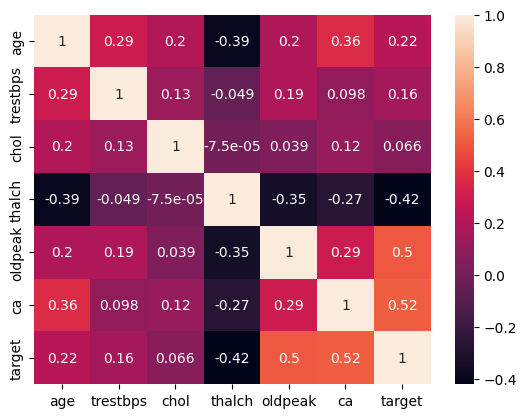

In [ ]:
# Plot the distribution of the 'sex' feature to understand gender representation in the dataset

sns.heatmap(df.corr(numeric_only=True),annot=True)

/tmp/ipython-input-4262058546.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'sex', data = df,palette='pastel')


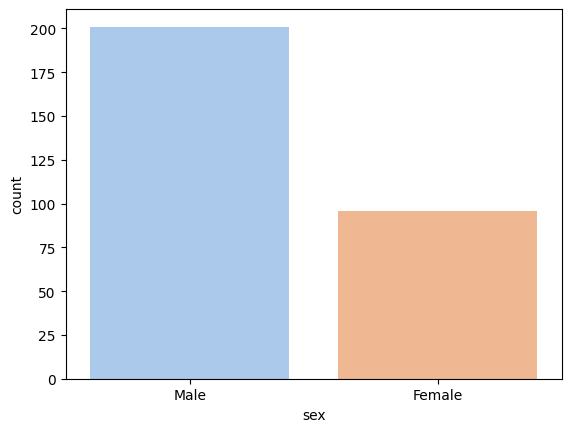

In [ ]:
# Plot the distribution of the 'sex' feature to understand gender representation in the dataset

sns.countplot(x = 'sex', data = df,palette='pastel')
plt.show()

<Axes: ylabel='count'>

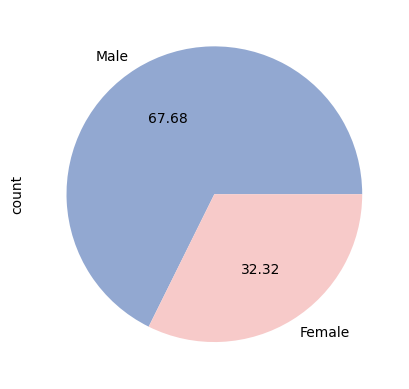

In [ ]:
# Visualize the proportion of each gender using a pie chart with custom colors for aesthetic clarity

df['sex'].value_counts().plot(kind = 'pie', autopct = '%1.2f',  colors = ['#92A8D1', '#F7CAC9', '#88B04B', '#6B5B95', '#FF6F61'])

In [ ]:
# Combine target values 1, 2, 3, and 4 into a single class labeled '1' to simplify binary classification

df.loc[df['target'] > 0, 'target'] = 1

/tmp/ipython-input-1013218418.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'target', data = df, palette='pastel')


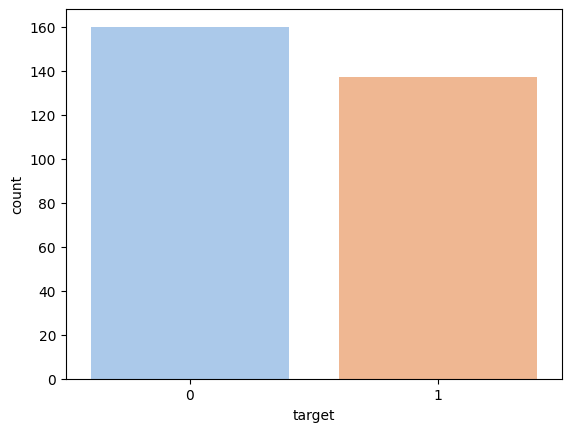

In [ ]:
# Plot the distribution of the binary target variable to check class balance

sns.countplot(x = 'target', data = df, palette='pastel')
plt.show()

<Axes: ylabel='count'>

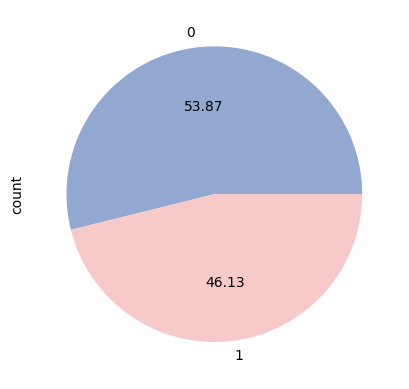

In [ ]:
# Visualize the target class proportions using a pie chart for clearer class imbalance insights

df['target'].value_counts().plot(kind = 'pie', autopct = '%1.2f',  colors = ['#92A8D1', '#F7CAC9', '#88B04B', '#6B5B95', '#FF6F61'])

/tmp/ipython-input-2880381290.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'cp', data = df,palette='pastel')


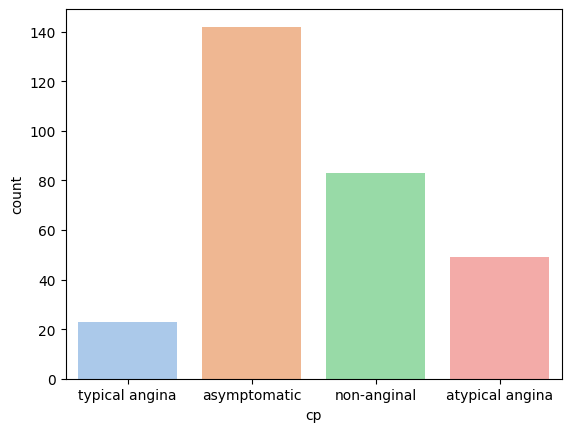

In [ ]:
# Visualize the distribution of chest pain types ('cp') to understand how they vary across the dataset

sns.countplot(x = 'cp', data = df,palette='pastel')
plt.show()

/tmp/ipython-input-908472976.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'slope', data = df,palette='pastel')


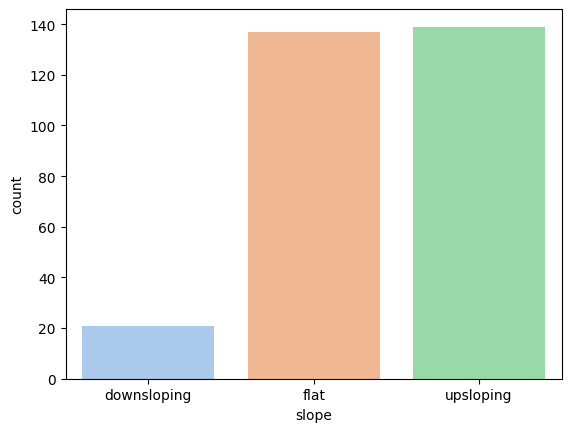

In [ ]:
# Visualize the distribution of the 'slope' feature to explore its frequency across patients

sns.countplot(x = 'slope', data = df,palette='pastel')
plt.show()

<Axes: ylabel='count'>

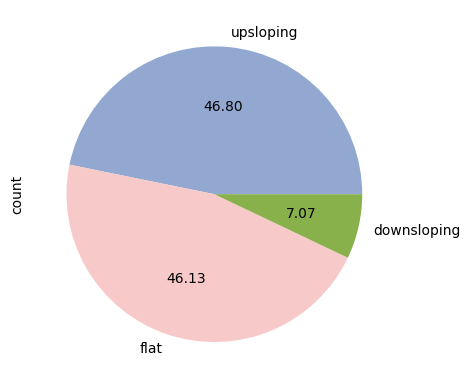

In [ ]:
# Show the proportion of each slope type using a pie chart for clearer visual comparison

df['slope'].value_counts().plot(kind = 'pie', autopct = '%1.2f', colors = ['#92A8D1', '#F7CAC9', '#88B04B', '#6B5B95', '#FF6F61'])

<Axes: ylabel='count'>

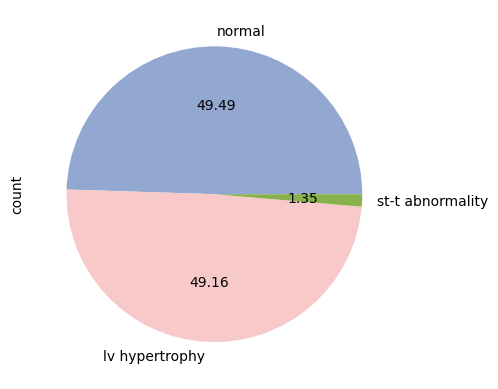

In [ ]:
# Display the distribution of 'restecg' (ECG results) using a pie chart to highlight class proportions

df['restecg'].value_counts().plot(kind = 'pie', autopct = '%1.2f', colors = ['#92A8D1', '#F7CAC9', '#88B04B', '#6B5B95', '#FF6F61'])

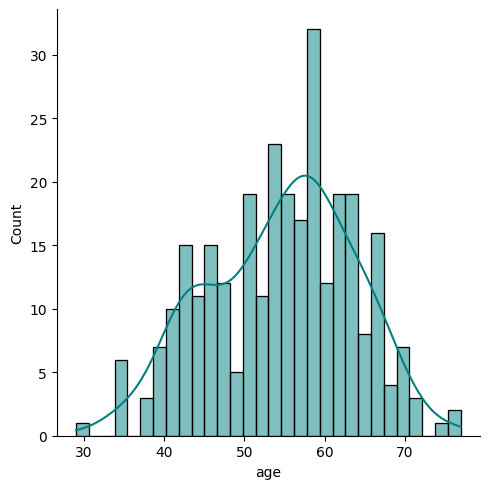

In [ ]:
# Plot the age distribution with KDE to understand the spread and central tendency of patient ages

sns.displot(df['age'],bins=30,color='teal',edgecolor='black',kde=True)

<Axes: xlabel='sex', ylabel='count'>

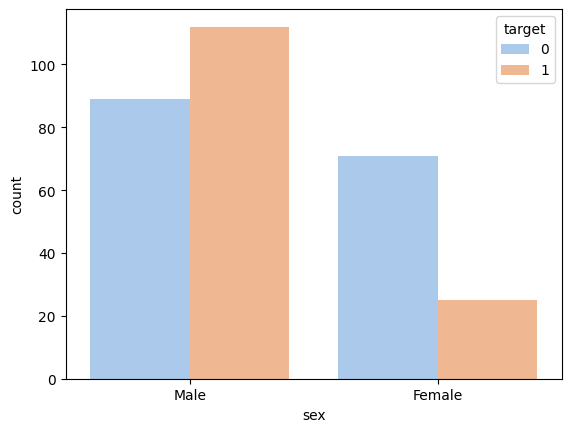

In [ ]:
# Compare gender distribution across target classes to explore potential gender-based risk patterns

sns.countplot(x='sex', hue='target',data=df, palette='pastel')

<Axes: xlabel='sex', ylabel='target'>

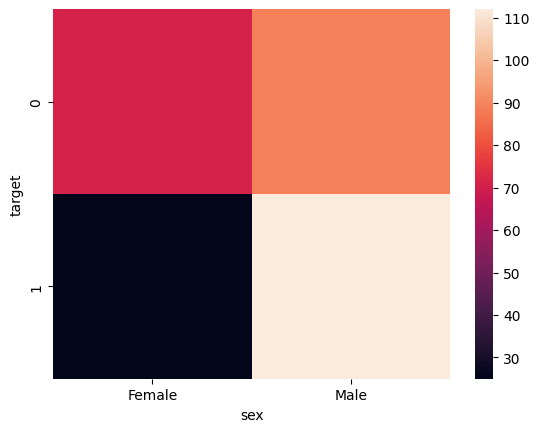

In [ ]:
# Use a heatmap to visualize the relationship between gender and target variable

sns.heatmap(pd.crosstab(df['target'],df['sex']))

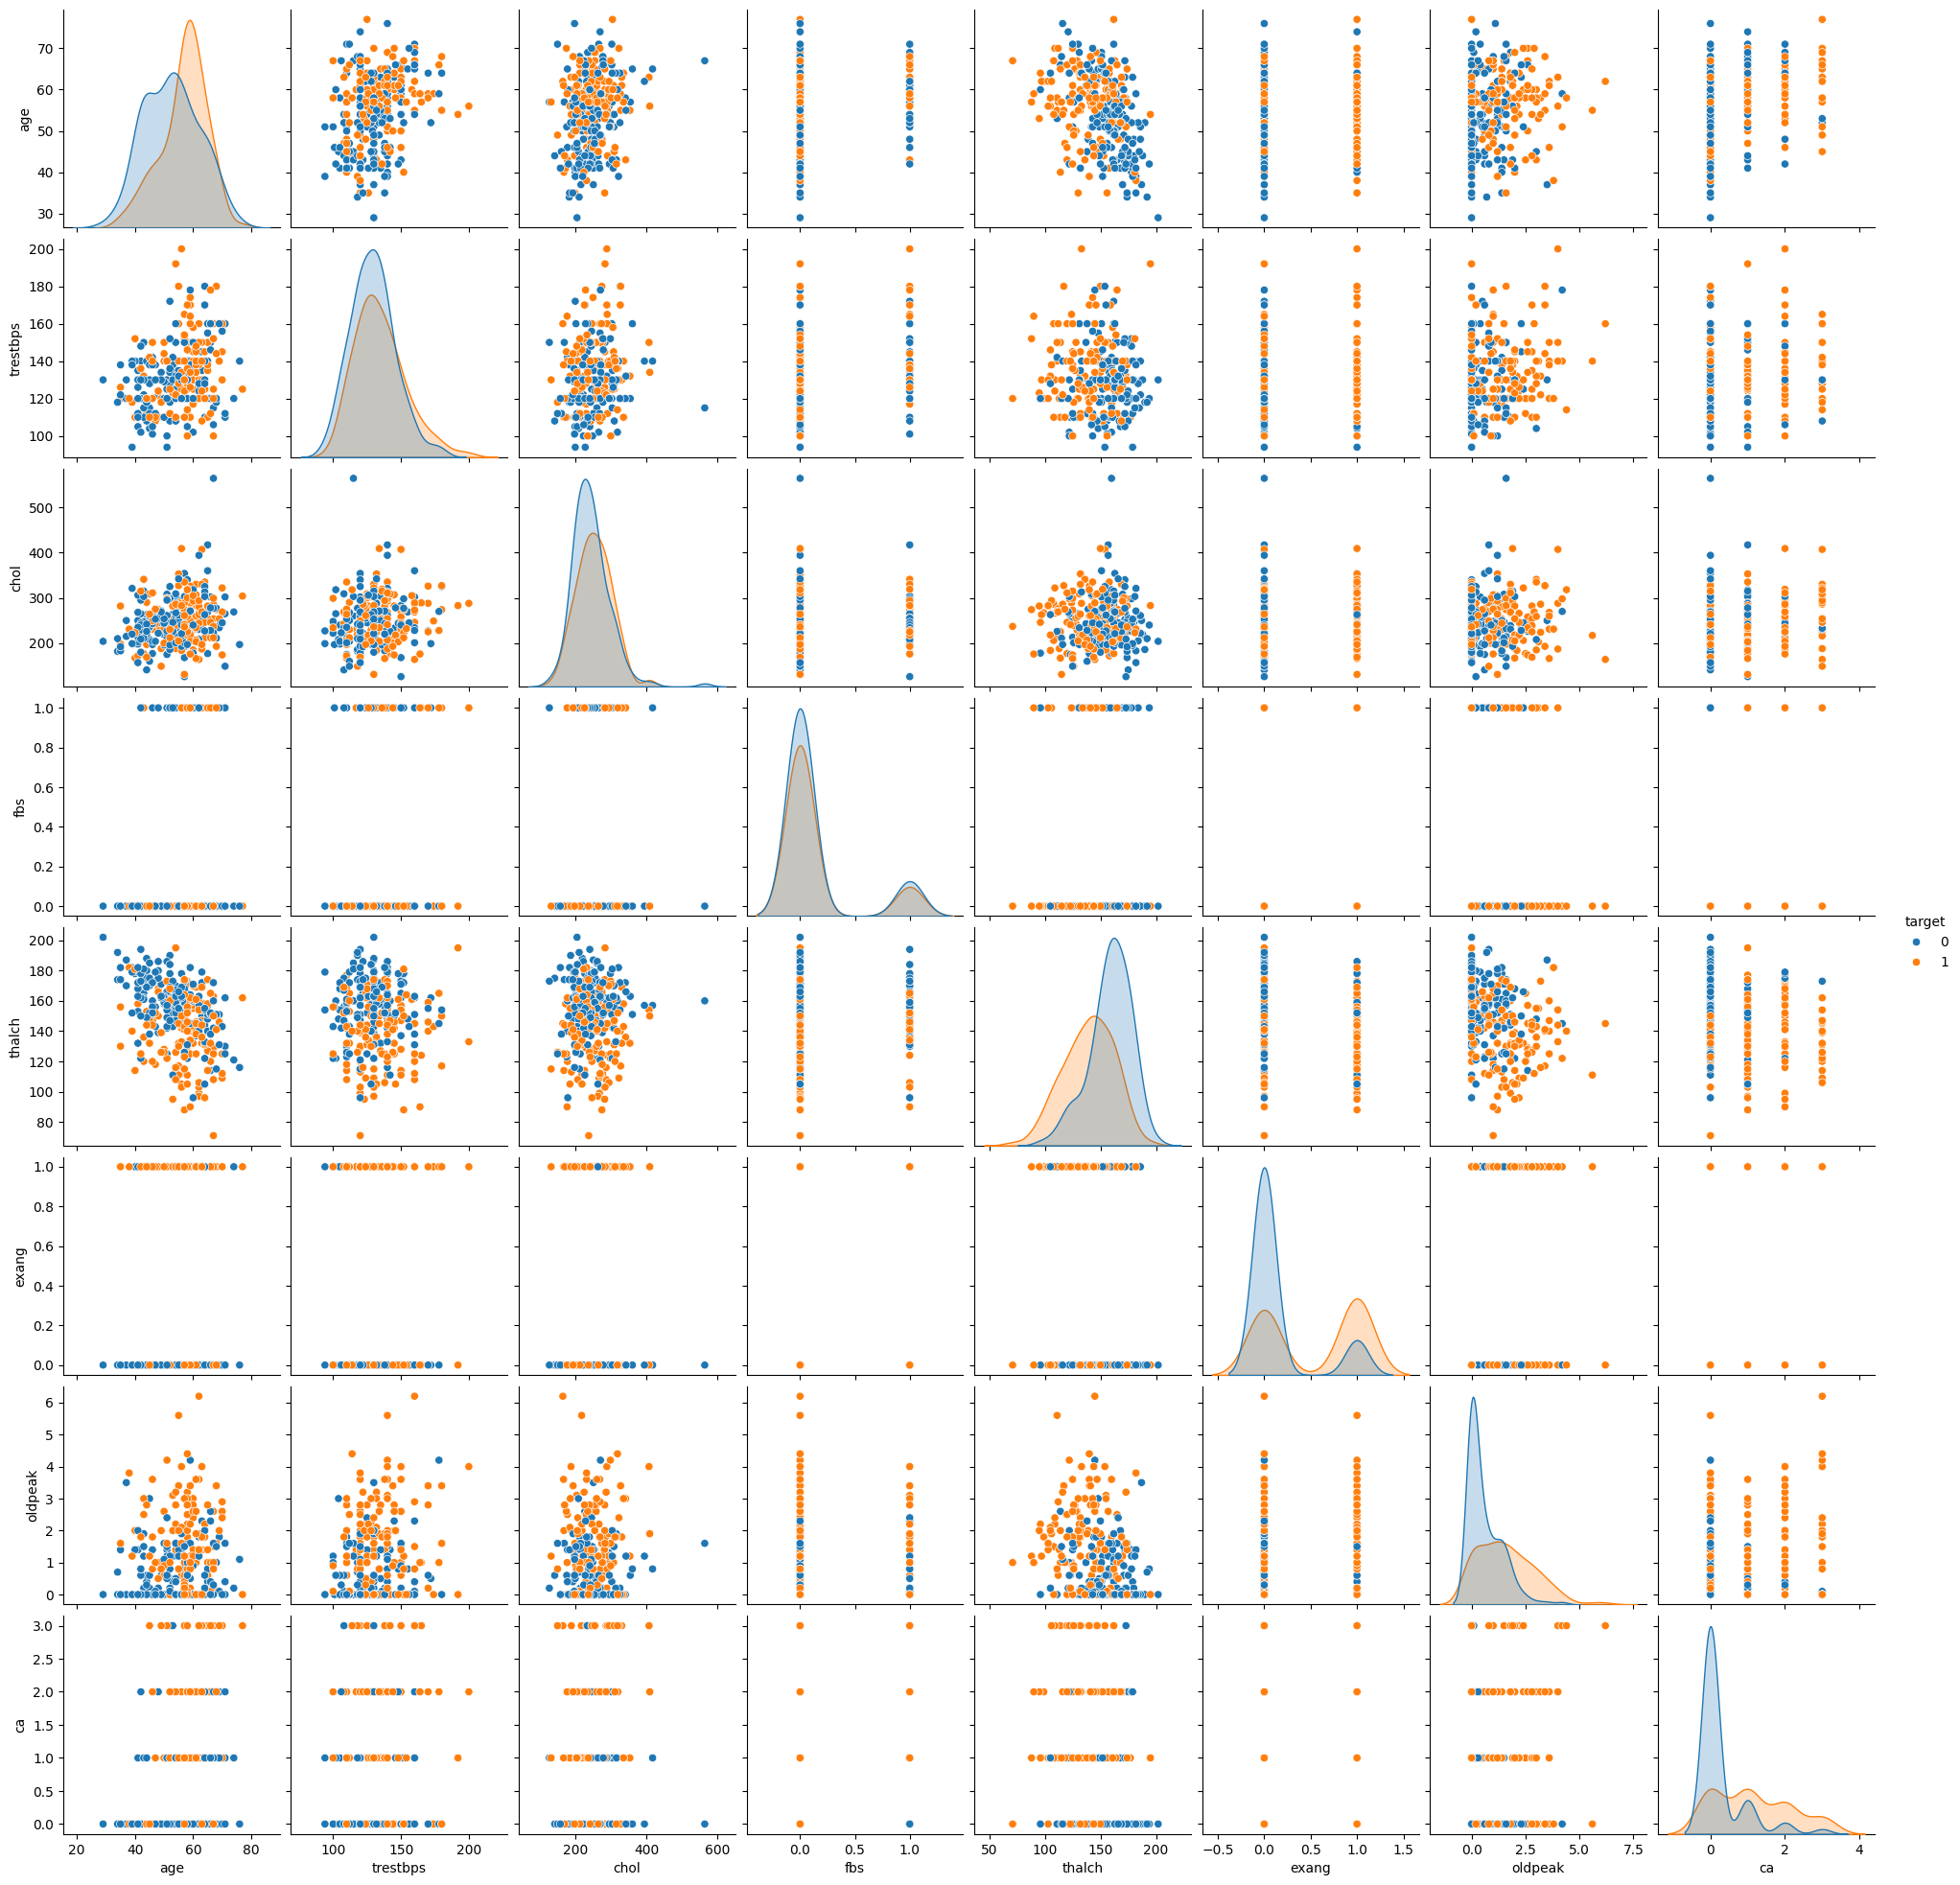

In [ ]:
# Create pairwise scatter plots for all features, colored by the target class
# This helps visualize relationships between features and how they separate across classes

sns.pairplot(df, hue = 'target',diag_kind='kde')

# Use KDE (Kernel Density Estimation) on the diagonal to show feature distributions smoothly
# This provides insight into the distribution of each feature across the target classes
plt.show()

<h1><b>Insights after EDA <br></h1></b>

1.   The dataset has 304 rows and 16 columns namely id, age, trestbps,oldpeak,
thalch, thal, chol, ca, num, sex, cp, fbs, restecg, dataset, exang and slope
2.   The statistical summary:


*   The range for age is 28-77 and the average age is 54 which shows that the dataset includes mostly the middle aged to older adults.
*   The range for testbps is 94-200 and mean is 131.7 mm of Hg. The normal values of this lie between 90- 200 mmHg, therefore indicating some patients have higher BP which is a great risk factor.


*   Chol ranges between 126-564 with an average value of 256.3 mg/dl. Shows that cholesterol varies widely and the average is slightly above the normal.
*   Thalch ranges between 71-202 with average of 149.7 heart rate

*   Ca ranges between 0-3
*   Oldpeak ranges between 0-6.2 with average of 1, This shows that average st depression is low but with some cases showing stress induced changes.


3.   There were some rows with null values that could not be reliably imputed, so these rows were removed from the dataset.
4.   Correlation between different features with the target column:<br>
The negatively correlated features in the following order -                        cp > thalch > slope > restecg
<br>Whereas the  positive correlated features in the following order -            Ca > oldpeak > exang > thal > sex > age > trestbps > chol > fbs

5. The gender distribution for the data is not balanced; the dataset contains the data for 201 males and 96 females.
6. The target variable originally had five numerical values: <br>0 (normal) and 1–4 (different degrees of heart problems).<br>Since some categories had very few samples, all positive cases were combined into a single class labeled 1. This results in a more balanced dataset with 160 normal cases (0) and 137 positive cases (1), which can further be balanced using techniques like SMOTE or ADASYN.
7. Cp has 4 values: asymptomatic (142), non-anginal (83), atypical angina (49) and typical angina (23). <br>This shows that asymptomatic and non-anginal cases dominate, while typical angina is relatively rare.
8. Slope has 3 values: downsloping (21), upsloping(139) and flat(137).<br>  Up-sloping and flat patterns are the most common in this dataset.
9. Rest ecg has 3 values : normal(147), st-t abnormality(4) and lv hypertrophy(146).<br> This shows that the dataset contains more normal and lv hypertrophy with significantly less st-t abnormality cases.
10. After analyzing the gender distribution across the target classes to examine gender-based risk patterns, it was observed that out of 201 male patients, over 100 were diagnosed with heart disease, whereas among 96 female patients, just over 20 had heart disease. This indicates that males in the dataset are at a significantly higher risk for heart-related conditions compared to females.


<h1><b> OUTLIERS HANDLING

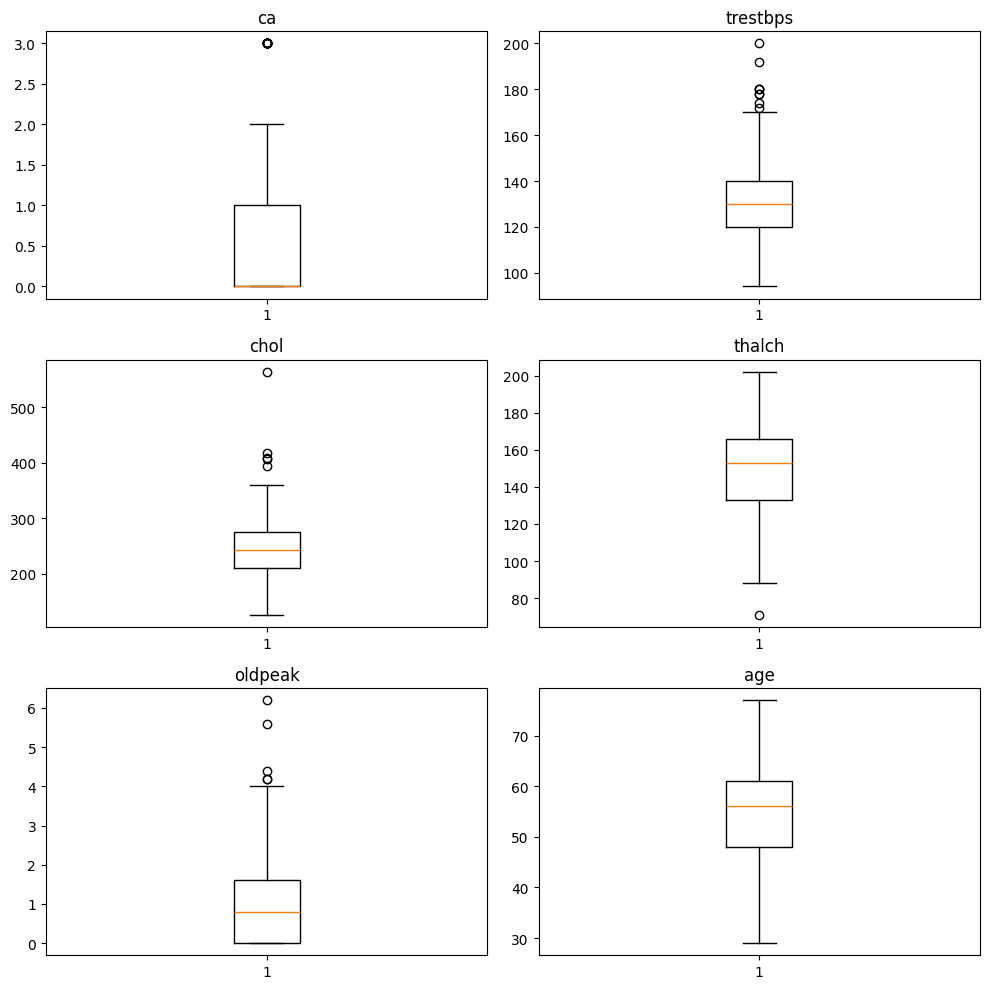

In [ ]:
# Creating subplots to visualize outliers across multiple numerical features
fig,axs= plt.subplots(3, 2, figsize=(10,10))
plt.title('Outlier Detection')

# Boxplot for 'ca' (number of major vessels colored by fluoroscopy)
axs[0,0].boxplot(df['ca'])
axs[0, 0].set_title('ca')

# Boxplot for 'trestbps' (resting blood pressure)
axs[0,1].boxplot(df['trestbps'])
axs[0,1].set_title('trestbps')

# Boxplot for 'chol' (serum cholesterol)
axs[1,0].boxplot(df['chol'])
axs[1,0].set_title('chol')

# Boxplot for 'thalch' (maximum heart rate achieved)
axs[1,1].boxplot(df['thalch'])
axs[1,1].set_title('thalch')

# Boxplot for 'oldpeak' (ST depression induced by exercise)
axs[2,0].boxplot(df['oldpeak'])
axs[2,0].set_title('oldpeak')

# Boxplot for 'age' to observe age-related outliers
axs[2,1].boxplot(df['age'])
axs[2,1].set_title('age')

# Adjust layout to prevent overlapping and display the plots
plt.tight_layout()
plt.show()

In [ ]:
# Define the numerical columns where outlier capping will be applied
numeric_cols = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

# Loop through each column to compute IQR and apply capping
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)       # First quartile (25th percentile)
    Q3 = df[col].quantile(0.75)       # Third quartile (75th percentile)
    IQR = Q3 - Q1                     # Interquartile range

    lower_limit = Q1 - 1.5 * IQR      # Lower bound for outlier detection
    upper_limit = Q3 + 1.5 * IQR      # Upper bound for outlier detection

    # Replace values outside the bounds with the respective limits
    df[col] = np.where(df[col] > upper_limit, upper_limit,
                       np.where(df[col] < lower_limit, lower_limit, df[col]))


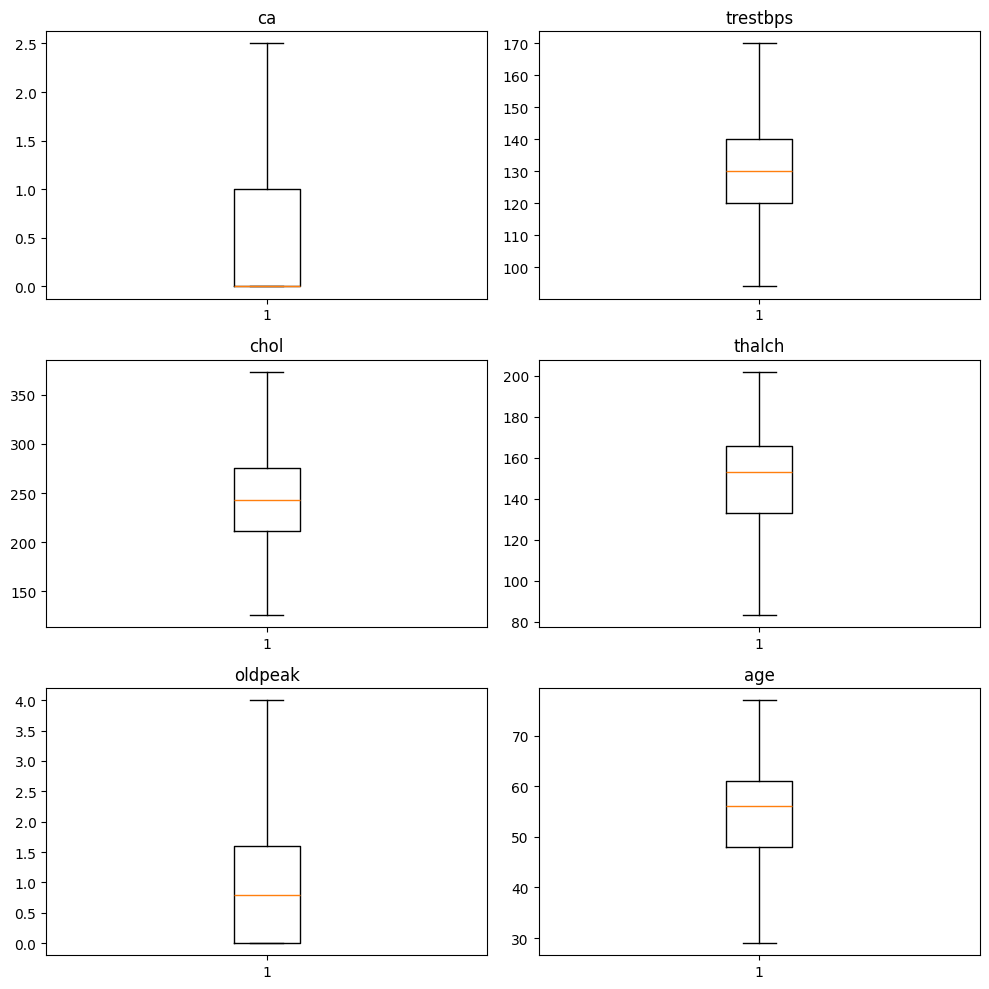

In [ ]:
# Replot boxplots to verify that outliers have been capped effectively
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
plt.title('Outlier Detection After Capping')

axs[0, 0].boxplot(df['ca'])
axs[0, 0].set_title('ca')

axs[0, 1].boxplot(df['trestbps'])
axs[0, 1].set_title('trestbps')

axs[1, 0].boxplot(df['chol'])
axs[1, 0].set_title('chol')

axs[1, 1].boxplot(df['thalch'])
axs[1, 1].set_title('thalch')

axs[2, 0].boxplot(df['oldpeak'])
axs[2, 0].set_title('oldpeak')

axs[2, 1].boxplot(df['age'])
axs[2, 1].set_title('age')

plt.tight_layout()
plt.show()

<H1><B>Scaling and Encoding the Data

In [ ]:
# Define categorical columns to be encoded
categorical_cols = ['sex',	'cp', 'fbs',	'restecg',	'exang', 'slope', 'thal']

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize a dictionary to store label encoders for each column
label_encoders = {}

# Apply label encoding to each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# Print the mapping of original labels to encoded values for each categorical column
for column, encoder in label_encoders.items():
    print(f"\nEncoding for column: {column}")
    for idx, label in enumerate(encoder.classes_):
        print(f"  {label} → {idx}")


Encoding for column: sex
  Female → 0
  Male → 1

Encoding for column: cp
  asymptomatic → 0
  atypical angina → 1
  non-anginal → 2
  typical angina → 3

Encoding for column: fbs
  False → 0
  True → 1

Encoding for column: restecg
  lv hypertrophy → 0
  normal → 1
  st-t abnormality → 2

Encoding for column: exang
  False → 0
  True → 1

Encoding for column: slope
  downsloping → 0
  flat → 1
  upsloping → 2

Encoding for column: thal
  fixed defect → 0
  normal → 1
  reversable defect → 2


In [ ]:
# all the categorical columns have been encoded to numerical value
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1,2.5,1,1
2,67,1,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140.0,241.0,0,1,123.0,1,0.2,1,0.0,2,1
298,45,1,3,110.0,264.0,0,1,132.0,0,1.2,1,0.0,2,1
299,68,1,0,144.0,193.0,1,1,141.0,0,3.4,1,2.0,2,1
300,57,1,0,130.0,131.0,0,1,115.0,1,1.2,1,1.0,2,1


In [ ]:
# Standardize numerical features to have mean = 0 and standard deviation = 1
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling and update the dataframe
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,0.936181,1,3,0.814195,-0.277680,1,0,0.015748,0,1.132325,0,-0.748628,0,0
1,1.378929,1,0,1.708484,0.832124,0,0,-1.828822,1,0.413350,1,2.161615,1,1
2,1.378929,1,0,-0.676288,-0.361439,0,0,-0.906537,1,1.401940,1,1.579566,2,1
3,-1.941680,1,2,-0.080095,0.078295,0,1,1.640727,0,2.210787,0,-0.748628,1,0
4,-1.498933,0,1,-0.080095,-0.884932,0,0,0.981952,0,0.323478,2,-0.748628,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.272059,0,0,0.516098,-0.110163,0,1,-1.170047,1,-0.754984,1,-0.748628,2,1
298,-1.056185,1,3,-1.272481,0.371451,0,1,-0.774782,0,0.143734,1,-0.748628,2,1
299,1.489615,1,0,0.754576,-1.115269,1,1,-0.379517,0,2.120915,1,1.579566,2,1
300,0.272059,1,0,-0.080095,-2.413531,0,1,-1.521394,1,0.143734,1,0.415469,2,1


In [ ]:
# Compute the correlation matrix for numerical features to identify linear relationships
df.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.092399,-0.063168,0.298085,0.194391,0.132062,-0.114134,-0.394325,0.096489,0.199974,-0.159405,0.372001,0.062160,0.227075
sex,-0.092399,1.000000,-0.043255,-0.057954,-0.182316,0.038850,-0.067075,-0.059573,0.143581,0.116110,-0.033345,0.089982,0.213887,0.278467
cp,-0.063168,-0.043255,1.000000,0.047737,-0.088189,0.119420,0.042091,0.294522,-0.380851,-0.134206,0.101299,-0.228367,-0.160589,-0.425358
trestbps,0.298085,-0.057954,0.047737,1.000000,0.143006,0.171275,-0.124932,-0.056184,0.054227,0.178660,-0.113365,0.093566,0.048352,0.147765
chol,0.194391,-0.182316,-0.088189,0.143006,1.000000,0.014482,-0.135224,-0.008542,0.075047,0.041347,0.019731,0.123472,0.068586,0.098614
fbs,0.132062,0.038850,0.119420,0.171275,0.014482,1.000000,-0.080821,-0.008649,-0.000893,0.014422,-0.047819,0.154237,-0.017100,0.003167
restecg,-0.114134,-0.067075,0.042091,-0.124932,-0.135224,-0.080821,1.000000,0.030115,-0.063125,-0.055885,0.087343,-0.109433,-0.006829,-0.134861
thalch,-0.394325,-0.059573,0.294522,-0.056184,-0.008542,-0.008649,0.030115,1.000000,-0.387906,-0.354997,0.390397,-0.270432,-0.114490,-0.424302
exang,0.096489,0.143581,-0.380851,0.054227,0.075047,-0.000893,-0.063125,-0.387906,1.000000,0.300770,-0.250572,0.159796,0.225192,0.421355
oldpeak,0.199974,0.116110,-0.134206,0.178660,0.041347,0.014422,-0.055885,-0.354997,0.300770,1.000000,-0.575283,0.293418,0.210929,0.429836


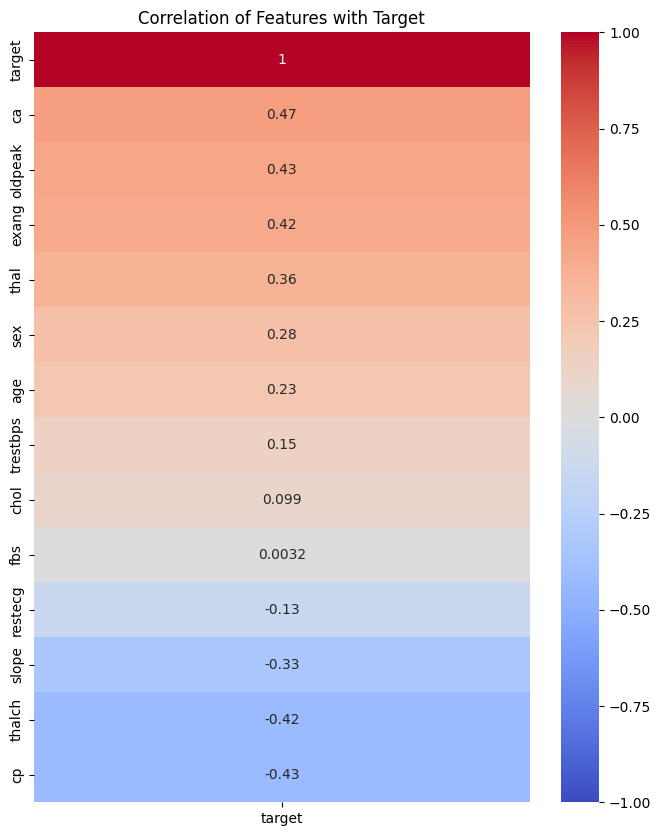

In [ ]:
correlation_matrix = df.corr(numeric_only=True)

# Focus only on the correlation of the target column with others
target_corr = correlation_matrix[['target']].sort_values(by='target', ascending=False)

# Plot heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Target')
plt.show()

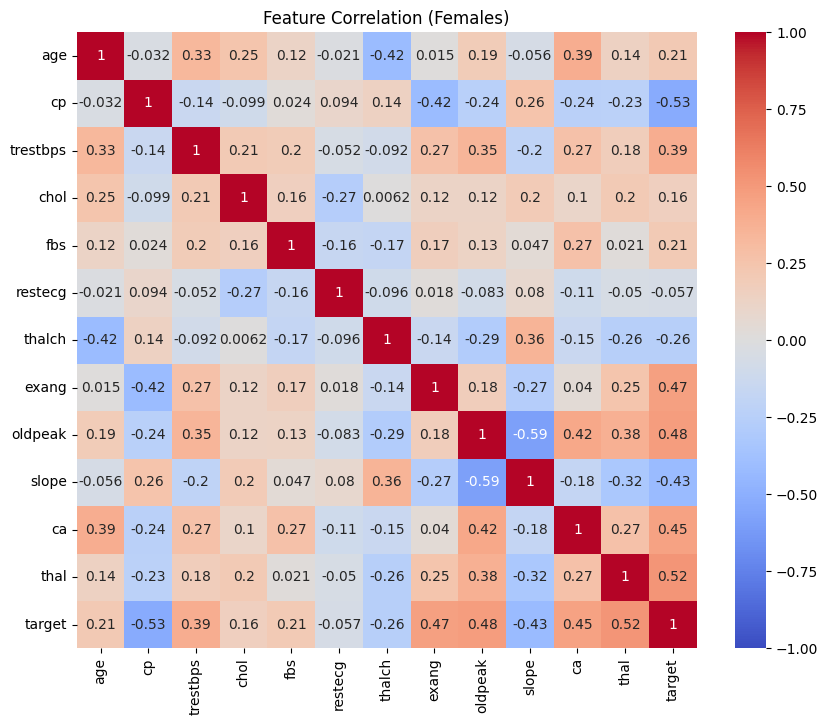

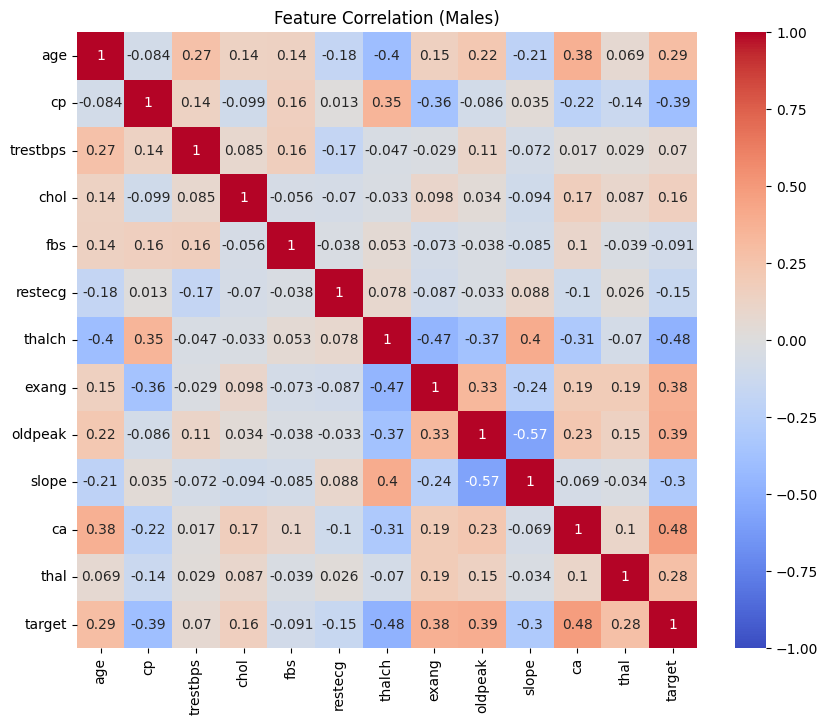

In [ ]:
female_df = df[df['sex'] == 0]
male_df = df[df['sex'] == 1]

# Compute correlation matrices for each group
female_corr = female_df.corr(numeric_only=True)
male_corr = male_df.corr(numeric_only=True)

# Drop 'gender' column if present in correlation matrix
female_corr = female_corr.drop(columns='sex', errors='ignore').drop(index='sex', errors='ignore')
male_corr = male_corr.drop(columns='sex', errors='ignore').drop(index='sex', errors='ignore')

# Plot heatmaps
plt.figure(figsize=(10, 8))
sns.heatmap(female_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation (Females)')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(male_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation (Males)')
plt.show()

<H1><B>Splitting the Dataset into Train and Test

In [ ]:
# Import train_test_split to divide the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('target', axis=1)  # All columns except 'target'
y = df['target']               # Target column

# Split data: 75% train, 25% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.25,        # 25% test set
    random_state = 42,      # For reproducibility
    stratify = y            # Keeps class ratio same in train & test
)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (222, 13)
Test set size: (75, 13)


<H1><B>Balancing the Dataset

In [ ]:
# importing the libraries
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter

In [ ]:
# Check class distribution before balancing
print("Before balancing:", Counter(y_train))

# Create SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE ONLY to training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Check class distribution after balancing
print("After balancing:", Counter(y_train_smote))

Before balancing: Counter({0: 120, 1: 102})
After balancing: Counter({0: 120, 1: 120})


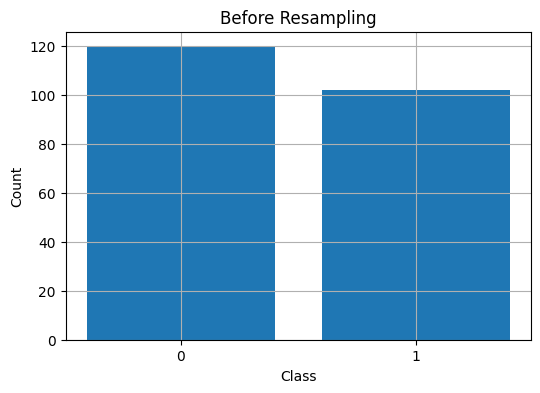

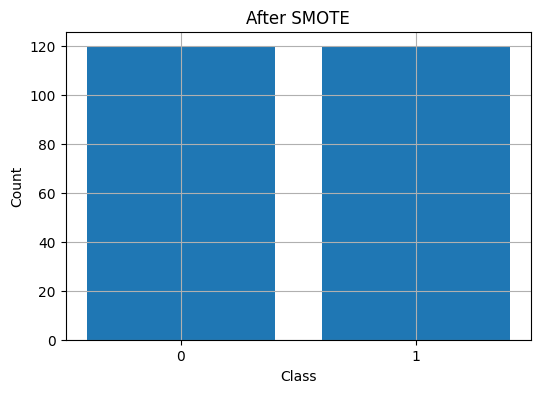

In [ ]:
# plotting graphs to visualize the classes before and after balancing
def plot_class_counts(y, title):
    plt.figure(figsize=(6, 4))
    plt.hist(y, bins=range(min(y), max(y)+2), align='left', rwidth=0.8)
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(range(min(y), max(y)+1))
    plt.grid(True)
    plt.show()

plot_class_counts(y_train, "Before Resampling")
plot_class_counts(y_train_smote, "After SMOTE")

In [ ]:
# balancing the data using Adasyn
from imblearn.over_sampling import ADASYN
# Display the class distribution in the training set before applying balancing techniques
print("Before balancing:", Counter(y_train))
adasyn = ADASYN(random_state=42)
X_train_ada, y_train_ada = adasyn.fit_resample(X_train, y_train)
print("After balancing:", Counter(y_train_ada))

Before balancing: Counter({0: 120, 1: 102})
After balancing: Counter({0: 120, 1: 108})


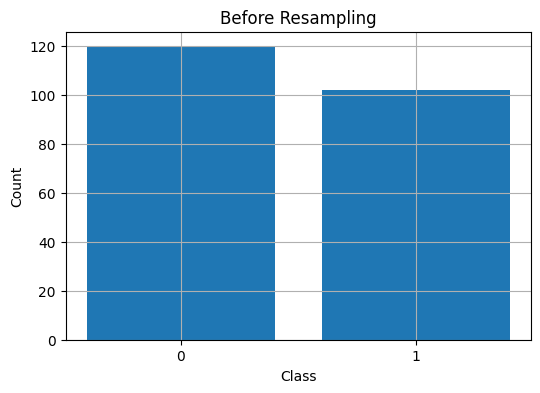

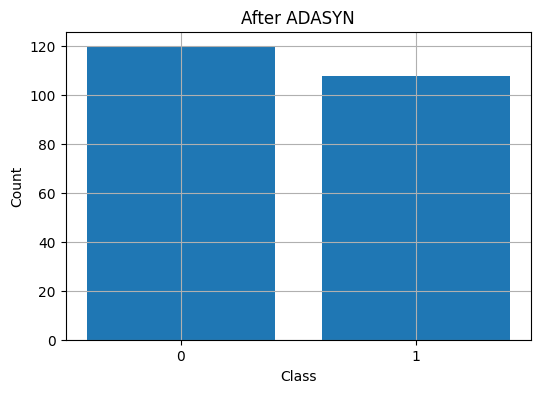

In [ ]:
# plotting graphs to visualize the classes before and after balancing
def plot_class_counts(y, title):
    plt.figure(figsize=(6, 4))
    plt.hist(y, bins=range(min(y), max(y)+2), align='left', rwidth=0.8)
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(range(min(y), max(y)+1))
    plt.grid(True)
    plt.show()

plot_class_counts(y_train, "Before Resampling")
plot_class_counts(y_train_ada, "After ADASYN")

In [ ]:
# save the dataset after preprocessing and encoding
df.to_csv('heart_disease_before_model_training(3).csv',index=False)

<h1><b>TOP FEATURES GENDER WISE

/tmp/ipython-input-1351043054.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=female_corr.head(top_n).values, y=female_corr.head(top_n).index, palette = 'bright')


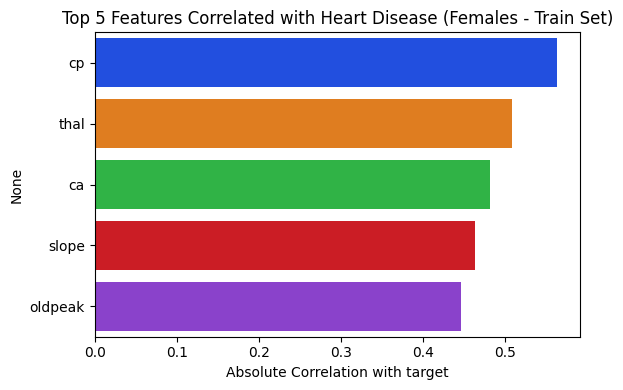

/tmp/ipython-input-1351043054.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=male_corr.head(top_n).values, y=male_corr.head(top_n).index, palette = 'bright')


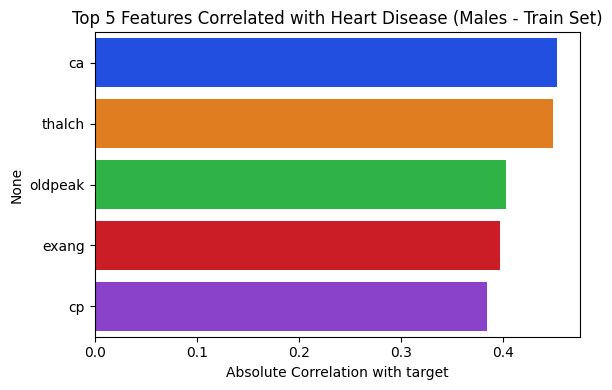

In [ ]:
# Plotting the graph for the top 5 features for both genders
train_data = X_train_smote.copy()
train_data['target'] = y_train_smote

# Split by gender
female_train = train_data[train_data['sex'] == 0]
male_train = train_data[train_data['sex'] == 1]
# Female correlations
female_corr = female_train.corr(numeric_only=True)['target'].drop('target').abs().sort_values(ascending=False)

# Male correlations
male_corr = male_train.corr(numeric_only=True)['target'].drop('target').abs().sort_values(ascending=False)

top_n = 5
# Top features for females
plt.figure(figsize=(6, 4))
sns.barplot(x=female_corr.head(top_n).values, y=female_corr.head(top_n).index, palette = 'bright')
plt.title(f'Top {top_n} Features Correlated with Heart Disease (Females - Train Set)')
plt.xlabel('Absolute Correlation with target')
plt.tight_layout()
plt.show()
# Top features for males
plt.figure(figsize=(6, 4))
sns.barplot(x=male_corr.head(top_n).values, y=male_corr.head(top_n).index, palette = 'bright')
plt.title(f'Top {top_n} Features Correlated with Heart Disease (Males - Train Set)')
plt.xlabel('Absolute Correlation with target')
plt.tight_layout()
plt.show()

<h1><b>Model Training

<h3><b>On the Data Balanced with Smote

In [ ]:
# Importing the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score
from lightgbm import LGBMClassifier


# Define models with tuned parameter search spaces
models_non_tree_smote = {
    "Logistic Regression": {
        "model": LogisticRegression(solver='liblinear'),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "penalty": ["l1", "l2"],
            "max_iter": [200, 500]
        }
    },
    "SVM": {
        "model": SVC(probability=True),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf", "poly"],
            "gamma": ["scale", "auto"]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7, 9],
            "weights": ["uniform", "distance"],
            "metric": ["minkowski", "euclidean", "manhattan"]
        }
    },
    "Naive Bayes": {
        "model": GaussianNB(),
        "params": {
            "var_smoothing": [1e-9, 1e-8, 1e-7]
        }
    },
    "LightGBM": {
        "model": LGBMClassifier(random_state=42),
        "params": {"n_estimators": [100, 200], "learning_rate": [0.05, 0.1], "max_depth": [-1, 5]}
    }
}

results_non_tree_smote = []

for name, mp in models_non_tree_smote.items():
    print(f"\n🔍 Tuning {name}...")

    if mp["params"]:
        grid = GridSearchCV(
            mp["model"],
            mp["params"],
            cv=5,
            scoring='f1',  # f1 or 'roc_auc' works better for medical datasets
            n_jobs=-1
        )
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        best_params = grid.best_params_
    else:
        best_model = mp["model"].fit(X_train, y_train)
        best_params = "Default"

    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)

    results_non_tree_smote.append({
        "Model": name,
        "Best Params": best_params,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Recall (Sensitivity)": recall_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Specificity": specificity,
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    })

# Save and display results
df_results_non_tree_smote = pd.DataFrame(results_non_tree_smote)
print(df_results_non_tree_smote)


🔍 Tuning Logistic Regression...

🔍 Tuning SVM...

🔍 Tuning KNN...

🔍 Tuning Naive Bayes...

🔍 Tuning LightGBM...
[LightGBM] [Info] Number of positive: 102, number of negative: 120
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 222, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.459459 -> initscore=-0.162519
[LightGBM] [Info] Start training from score -0.162519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

In [ ]:
# Importing the required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score
import pandas as pd
import numpy as np

# Define models with tuned parameter search spaces
models_tree_smote = {
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "max_depth": [3, 5, 7, None],
            "min_samples_split": [2, 5, 10],
            "criterion": ["gini", "entropy"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200, 300, 500],
            "max_depth": [None, 5, 10, 20],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "max_features": ["sqrt", "log2"]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200, 300, 500],
            "learning_rate": [0.01, 0.05, 0.1, 0.2],
            "max_depth": [3, 5, 7],
            "subsample": [0.8, 1.0],
            "max_features": ["sqrt", "log2"]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(random_state=42, n_jobs=-1, eval_metric='logloss', use_label_encoder=False),
        "params": {
            "n_estimators": [100, 200, 300, 500],
            "learning_rate": [0.01, 0.05, 0.1, 0.2],
            "max_depth": [3, 5, 7, 10],
            "subsample": [0.8, 1.0],
            "colsample_bytree": [0.8, 1.0]
        }
    }
}

results_tree_smote = []

for name, mp in models_tree_smote.items():
    print(f"\n🔍 Tuning {name}...")

    # Randomized search for speed, trying up to 30 random combinations
    search = RandomizedSearchCV(
        mp["model"],
        mp["params"],
        n_iter=30,              # limits to 30 combinations for speed
        cv=5,
        scoring='roc_auc',      # better metric for medical datasets
        n_jobs=-1,
        random_state=42
    )

    search.fit(X_train_smote, y_train_smote)

    best_model = search.best_estimator_
    best_params = search.best_params_

    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)

    results_tree_smote.append({
        "Model": name,
        "Best Params": best_params,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Recall (Sensitivity)": recall_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Specificity": specificity,
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    })

# Convert results to DataFrame
df_results_tree_smote = pd.DataFrame(results_tree_smote)
print(df_results_tree_smote.sort_values(by="ROC-AUC", ascending=False))


🔍 Tuning Decision Tree...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 24 is smaller than n_iter=30. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



🔍 Tuning Random Forest...

🔍 Tuning Gradient Boosting...

🔍 Tuning XGBoost...
               Model                                        Best Params  \
2  Gradient Boosting  {'subsample': 0.8, 'n_estimators': 100, 'max_f...   
1      Random Forest  {'n_estimators': 100, 'min_samples_split': 5, ...   
3            XGBoost  {'subsample': 0.8, 'n_estimators': 100, 'max_d...   
0      Decision Tree  {'min_samples_split': 10, 'max_depth': 3, 'cri...   

   Accuracy  F1 Score  Recall (Sensitivity)  Precision  Specificity   ROC-AUC  
2  0.826667  0.805970              0.771429   0.843750        0.875  0.923571  
1  0.786667  0.764706              0.742857   0.787879        0.825  0.921429  
3  0.826667  0.800000              0.742857   0.866667        0.900  0.916429  
0  0.720000  0.695652              0.685714   0.705882        0.750  0.783571  


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:44:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
# Merging the tree based and non tree based models result dataframes into the final result smote dataframe
results_smote = pd.concat([df_results_non_tree_smote,df_results_tree_smote],axis=0).reset_index(drop=True)
results_smote

,Model,Best Params,Accuracy,F1 Score,Recall (Sensitivity),Precision,Specificity,ROC-AUC
0,Logistic Regression,"{'C': 1, 'max_iter': 200, 'penalty': 'l2'}",0.880000,0.869565,0.857143,0.882353,0.900,0.943571
1,SVM,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}",0.853333,0.845070,0.857143,0.833333,0.850,0.938571
2,KNN,"{'metric': 'manhattan', 'n_neighbors': 9, 'wei...",0.853333,0.830769,0.771429,0.900000,0.925,0.933929
3,Naive Bayes,{'var_smoothing': 1e-09},0.853333,0.840580,0.828571,0.852941,0.875,0.921429
4,LightGBM,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",0.866667,0.852941,0.828571,0.878788,0.900,0.913571
5,Decision Tree,"{'min_samples_split': 10, 'max_depth': 3, 'cri...",0.720000,0.695652,0.685714,0.705882,0.750,0.783571
6,Random Forest,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.786667,0.764706,0.742857,0.787879,0.825,0.921429
7,Gradient Boosting,"{'subsample': 0.8, 'n_estimators': 100, 'max_f...",0.826667,0.805970,0.771429,0.843750,0.875,0.923571
8,XGBoost,"{'subsample': 0.8, 'n_estimators': 100, 'max_d...",0.826667,0.800000,0.742857,0.866667,0.900,0.916429


In [ ]:
# Importing the libraries
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import pandas as pd

# Neural Network model
model = Sequential()

# Input layer
model.add(Dense(64, activation='relu', input_dim=X_train_smote.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Hidden layers
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with tuned learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('heart_disease_best.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001, verbose=1)

# Fit the model
history_smote = model.fit(X_train_smote, y_train_smote,
                    epochs=100,
                    batch_size=16,
                    validation_split=0.2,
                    callbacks=[checkpoint, reduce_lr],
                    verbose=1)

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_proba = model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
roc_auc = roc_auc_score(y_test, y_proba)

# DataFrame output
df_ann_smote = pd.DataFrame([{
    'Model': 'ANN',
    'Best Params': 'NaN',
    'Accuracy': accuracy,
    'F1 Score': report['1']['f1-score'],
    'Recall (Sensitivity)': report['1']['recall'],
    'Precision': report['1']['precision'],
    'Specificity': specificity,
    'ROC-AUC': roc_auc
}])

print(df_ann_smote)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
 1/12 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.4375 - loss: 0.9416
Epoch 1: val_accuracy improved from -inf to 0.72917, saving model to heart_disease_best.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5347 - loss: 0.8552 - val_accuracy: 0.7292 - val_loss: 0.5849 - learning_rate: 0.0010
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6264 - loss: 0.7443  
Epoch 2: val_accuracy improved from 0.72917 to 0.75000, saving model to heart_disease_best.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6307 - loss: 0.7383 - val_accuracy: 0.7500 - val_loss: 0.5824 - learning_rate: 0.0010
Epoch 3/100
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7500 - loss: 0.5429
Epoch 3: val_accuracy did not improve from 0.75000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7616 - loss: 0.5203 - val_accuracy: 0.6875 - val_loss: 0.5852 - learning_rate: 0.0010
Epoch 4/100
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6875 - loss: 0.5772
Epoch 4: val_accuracy did not improve from 0.75000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7587 - loss: 0.4886 - val_accuracy: 0.6875 - val_loss: 0.5851 - learning_rate: 0.0010
Epoch 5/100
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7653 - loss: 0.4706 
Epoch 5: val_accuracy did not improve from 0.75000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7670 - loss: 0.4678 - val_accuracy: 0.6667 - val_loss: 0.5851 - learning_rate: 0.0010
Epoch 6/100
12/12 ━━━━━━━━━━━━

In [ ]:
ann_model_smote = history_smote
# This is the trained ANN
models_smote = {
    **models_tree_smote,
    **models_non_tree_smote,
    "ANN": ann_model_smote
}

In [ ]:
# merging df_ann_smote with results_smote to include ann model results
results_smote = pd.concat([results_smote,df_ann_smote],axis=0).reset_index(drop=True)

/tmp/ipython-input-1123250206.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='Accuracy (%)', data=results_smote, palette='viridis')


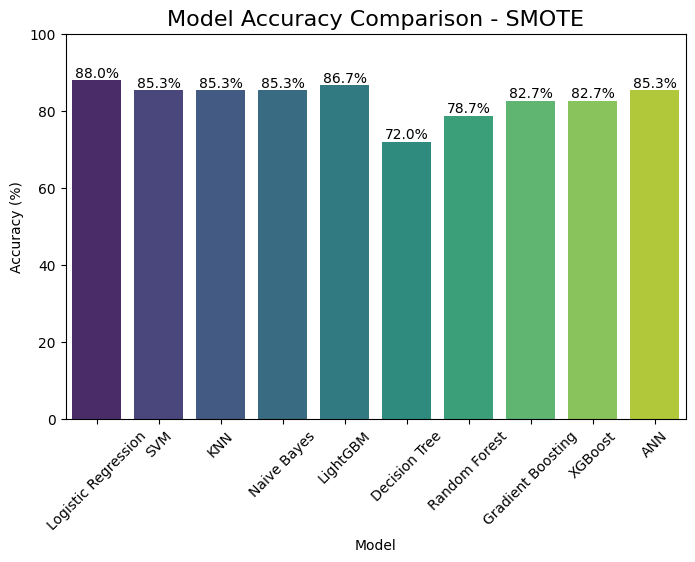

In [ ]:
# Plotting the graph for visualizing model accuracy comparison for different models trained on data balanced using smote
results_smote['Accuracy (%)'] = results_smote['Accuracy'] * 100

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Model', y='Accuracy (%)', data=results_smote, palette='viridis')

# Title & formatting
plt.title('Model Accuracy Comparison - SMOTE', fontsize=16)
plt.xticks(rotation=45)
plt.ylim(0, 100)

# Add percentage labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

<h3><b>For the data balanced with Adasyn

In [ ]:
# Importing the required libraries
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
import numpy as np

# Expanded parameter ranges
models_tree_ada = {
    "Decision Tree": {
        "model": DecisionTreeClassifier(class_weight='balanced', random_state=42),
        "params": {
            "max_depth": [None, 3, 5, 7, 10],
            "min_samples_split": [2, 5, 10, 20],
            "criterion": ["gini", "entropy"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(class_weight='balanced', random_state=42),
        "params": {
            "n_estimators": [100, 200, 300, 500],
            "max_depth": [None, 5, 7, 10],
            "min_samples_split": [2, 5, 10],
            "max_features": ["sqrt", "log2"]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200, 300, 500],
            "learning_rate": [0.01, 0.05, 0.1, 0.2],
            "max_depth": [3, 5, 7]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        "params": {
            "n_estimators": [100, 200, 300, 500],
            "learning_rate": [0.01, 0.05, 0.1, 0.2],
            "max_depth": [3, 5, 7, 10],
            "subsample": [0.7, 0.8, 1.0],
            "colsample_bytree": [0.7, 0.8, 1.0]
        }
    }
}

models_tree = []
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, mp in models_tree_ada.items():
    print(f"\n🔍 Tuning {name}...")

    search = RandomizedSearchCV(
        mp["model"],
        mp["params"],
        n_iter=20,  # Number of random combinations to try
        scoring='accuracy',
        cv=cv,
        n_jobs=-1,
        random_state=42
    )
    search.fit(X_train_ada, y_train_ada)

    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)

    models_tree.append({
        "Model": name,
        "Best Params": search.best_params_,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Recall (Sensitivity)": recall_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Specificity": specificity,
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    })

df_results_tree_ada = pd.DataFrame(models_tree)
print(df_results_tree_ada)


🔍 Tuning Decision Tree...

🔍 Tuning Random Forest...

🔍 Tuning Gradient Boosting...

🔍 Tuning XGBoost...
               Model                                        Best Params  \
0      Decision Tree  {'min_samples_split': 2, 'max_depth': 5, 'crit...   
1      Random Forest  {'n_estimators': 200, 'min_samples_split': 5, ...   
2  Gradient Boosting  {'n_estimators': 100, 'max_depth': 3, 'learnin...   
3            XGBoost  {'subsample': 0.7, 'n_estimators': 300, 'max_d...   

   Accuracy  F1 Score  Recall (Sensitivity)  Precision  Specificity   ROC-AUC  
0  0.693333  0.646154              0.600000   0.700000        0.775  0.660357  
1  0.840000  0.828571              0.828571   0.828571        0.850  0.919286  
2  0.826667  0.805970              0.771429   0.843750        0.875  0.899286  
3  0.866667  0.857143              0.857143   0.857143        0.875  0.917143  


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:47:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
# Importing the required libraries
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Define models & hyperparameters
models_non_tree_ada = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {"C": [0.1, 1, 10], "solver": ["liblinear", "lbfgs"]}
    },
    "Naive Bayes": {
        "model": GaussianNB(),
        "params": {}
    },
    "SVM": {
        "model": SVC(probability=True),
        "params": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"], "gamma": ["scale", "auto"]}
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {"n_neighbors": [3, 5, 7, 9]}
    },
    "LightGBM": {
        "model": LGBMClassifier(random_state=42),
        "params": {"n_estimators": [100, 200], "learning_rate": [0.05, 0.1], "max_depth": [-1, 5]}
    }
}

# Store results
results_non_tree_ada = []

# Stratified K-Fold for consistent splits
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, mp in models_non_tree_ada.items():
    print(f"\n🔍 Tuning {name}...")
    if mp["params"]:  # If model has parameters to tune
        grid = GridSearchCV(mp["model"], mp["params"], cv=cv, scoring='accuracy', n_jobs=-1)
        grid.fit(X_train_ada, y_train_ada)  # ✅ Train on balanced data
        best_model = grid.best_estimator_
        best_params = grid.best_params_
    else:
        best_model = mp["model"].fit(X_train_ada, y_train_ada)  # ✅ Train on balanced data
        best_params = "Default"

    # Predictions
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]

    # Confusion matrix for specificity
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)

    # Append results
    results_non_tree_ada.append({
        "Model": name,
        "Best Params": best_params,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Recall (Sensitivity)": recall_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Specificity": specificity,

        "ROC-AUC": roc_auc_score(y_test, y_proba)
    })

# Display results
results_df_ada = pd.DataFrame(results_non_tree_ada)
print("\n📊 Model Comparison:\n", results_df_ada.sort_values(by="Accuracy", ascending=False))


🔍 Tuning Logistic Regression...

🔍 Tuning Naive Bayes...

🔍 Tuning SVM...

🔍 Tuning KNN...

🔍 Tuning LightGBM...
[LightGBM] [Info] Number of positive: 108, number of negative: 120
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 231
[LightGBM] [Info] Number of data points in the train set: 228, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.473684 -> initscore=-0.105361
[LightGBM] [Info] Start training from score -0.105361
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

In [ ]:
# merging the tree and non tree datasets to final dataset
result_ada = pd.concat([df_results_tree_ada,results_df_ada],axis=0).reset_index(drop=True)
result_ada

,Model,Best Params,Accuracy,F1 Score,Recall (Sensitivity),Precision,Specificity,ROC-AUC
0,Decision Tree,"{'min_samples_split': 2, 'max_depth': 5, 'crit...",0.693333,0.646154,0.600000,0.700000,0.775,0.660357
1,Random Forest,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.840000,0.828571,0.828571,0.828571,0.850,0.919286
2,Gradient Boosting,"{'n_estimators': 100, 'max_depth': 3, 'learnin...",0.826667,0.805970,0.771429,0.843750,0.875,0.899286
3,XGBoost,"{'subsample': 0.7, 'n_estimators': 300, 'max_d...",0.866667,0.857143,0.857143,0.857143,0.875,0.917143
4,Logistic Regression,"{'C': 0.1, 'solver': 'liblinear'}",0.853333,0.835821,0.800000,0.875000,0.900,0.942857
5,Naive Bayes,Default,0.840000,0.828571,0.828571,0.828571,0.850,0.921429
6,SVM,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}",0.853333,0.830769,0.771429,0.900000,0.925,0.950714
7,KNN,{'n_neighbors': 7},0.826667,0.816901,0.828571,0.805556,0.825,0.908214
8,LightGBM,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",0.840000,0.818182,0.771429,0.870968,0.900,0.914286


In [ ]:
# Importing required libraries
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import pandas as pd

# ANN model for ADASYN balanced dataset
model = Sequential()

# Input layer
model.add(Dense(64, activation='relu', input_dim=X_train_ada.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Hidden layers
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('heart_disease_best_adasyn.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001, verbose=1)

# Train
history_ada = model.fit(X_train_ada, y_train_ada,
                    epochs=100,
                    batch_size=16,
                    validation_split=0.2,
                    callbacks=[checkpoint, reduce_lr],
                    verbose=1)

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_proba = model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
roc_auc = roc_auc_score(y_test, y_proba)

# DataFrame output
df_ann_adasyn = pd.DataFrame([{
    'Model': 'ANN_ADASYN',
    'Best Params': 'NaN',
    'Accuracy': accuracy,
    'F1 Score': report['1']['f1-score'],
    'Recall (Sensitivity)': report['1']['recall'],
    'Precision': report['1']['precision'],
    'Specificity': specificity,
    'ROC-AUC': roc_auc
}])

print(df_ann_adasyn)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/12 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.5625 - loss: 0.7247
Epoch 1: val_accuracy improved from -inf to 0.71739, saving model to heart_disease_best_adasyn.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4785 - loss: 0.8979 - val_accuracy: 0.7174 - val_loss: 0.6611 - learning_rate: 0.0010
Epoch 2/100
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5000 - loss: 0.9231
Epoch 2: val_accuracy did not improve from 0.71739
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5216 - loss: 0.8250 - val_accuracy: 0.6304 - val_loss: 0.6653 - learning_rate: 0.0010
Epoch 3/100
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6875 - loss: 0.4820
Epoch 3: val_accuracy did not improve from 0.71739
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6341 - loss: 0.6600 - val_accuracy: 0.5870 - val_loss: 0.6656 - learning_rate: 0.0010
Epoch 4/100
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6875 - loss: 0.5432
Epoch 4: val_accuracy did not improve from 0.71739
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6738 - loss: 0.5866 - val_accuracy: 0.5870 - val_loss: 0.6618 - learning_rate: 0.0010
Epoch 5/100
 1/12 ━━━━━━━━━━━

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8753 - loss: 0.3501 - val_accuracy: 0.7391 - val_loss: 0.5542 - learning_rate: 0.0010
Epoch 20/100
10/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8849 - loss: 0.3190 
Epoch 20: val_accuracy did not improve from 0.73913
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8833 - loss: 0.3211 - val_accuracy: 0.7174 - val_loss: 0.5565 - learning_rate: 0.0010
Epoch 21/100
10/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8450 - loss: 0.3303 
Epoch 21: val_accuracy did not improve from 0.73913
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8440 - loss: 0.3351 - val_accuracy: 0.7391 - val_loss: 0.5593 - learning_rate: 0.0010
Epoch 22/100
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8214 - loss: 0.4347 
Epoch 22: val_accuracy improved from 0.73913 to 0.76087, saving model to heart_disease_best_adasyn.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8235 - loss: 0.4315 - val_accuracy: 0.7609 - val_loss: 0.5565 - learning_rate: 0.0010
Epoch 23/100
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9082 - loss: 0.3028 
Epoch 23: val_accuracy did not improve from 0.76087
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9046 - loss: 0.3066 - val_accuracy: 0.7391 - val_loss: 0.5552 - learning_rate: 0.0010
Epoch 24/100
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8750 - loss: 0.3832
Epoch 24: val_accuracy did not improve from 0.76087

Epoch 24: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8922 - loss: 0.3124 - val_accuracy: 0.7391 - val_loss: 0.5569 - learning_rate: 0.0010
Epoch 25/100
 1/12 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.9375 - loss: 0.2156
Epoch 25: val_accuracy did not improve from 0.76087
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8784 - loss: 0.3015 - val_accu

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
        Model Best Params  Accuracy  F1 Score  Recall (Sensitivity)  \
0  ANN_ADASYN         NaN       0.8  0.776119              0.742857   

   Precision  Specificity   ROC-AUC  
0     0.8125         0.85  0.905714  


In [ ]:
# merging the result_ada and df_ann_adasyn dataframes to final result_ada dataframe
result_ada = pd.concat([result_ada,df_ann_adasyn],axis=0).reset_index(drop=True)

In [ ]:
result_ada

,Model,Best Params,Accuracy,F1 Score,Recall (Sensitivity),Precision,Specificity,ROC-AUC
0,Decision Tree,"{'min_samples_split': 2, 'max_depth': 5, 'crit...",0.693333,0.646154,0.600000,0.700000,0.775,0.660357
1,Random Forest,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.840000,0.828571,0.828571,0.828571,0.850,0.919286
2,Gradient Boosting,"{'n_estimators': 100, 'max_depth': 3, 'learnin...",0.826667,0.805970,0.771429,0.843750,0.875,0.899286
3,XGBoost,"{'subsample': 0.7, 'n_estimators': 300, 'max_d...",0.866667,0.857143,0.857143,0.857143,0.875,0.917143
4,Logistic Regression,"{'C': 0.1, 'solver': 'liblinear'}",0.853333,0.835821,0.800000,0.875000,0.900,0.942857
5,Naive Bayes,Default,0.840000,0.828571,0.828571,0.828571,0.850,0.921429
6,SVM,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}",0.853333,0.830769,0.771429,0.900000,0.925,0.950714
7,KNN,{'n_neighbors': 7},0.826667,0.816901,0.828571,0.805556,0.825,0.908214
8,LightGBM,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",0.840000,0.818182,0.771429,0.870968,0.900,0.914286
9,ANN_ADASYN,NaN,0.853333,0.830769,0.771429,0.900000,0.925,0.940000


In [ ]:
ann_model_ada = history_ada  # This is the trained ANN
models_ada = {
    **models_tree_ada,
    **models_non_tree_ada,
    "ANN": ann_model_ada
}

/tmp/ipython-input-2470942760.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='Accuracy (%)', data=result_ada, palette='viridis')


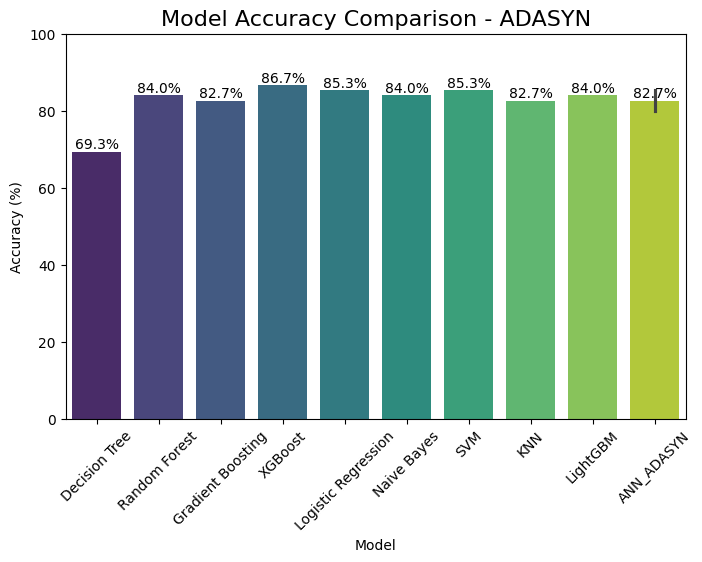

In [ ]:
# Plotting the graph for visualizing model accuracy comparison for different models trained on data balanced using adasyn
result_ada['Accuracy (%)'] = result_ada['Accuracy'] * 100

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Model', y='Accuracy (%)', data=result_ada, palette='viridis')

# Title & formatting
plt.title('Model Accuracy Comparison - ADASYN', fontsize=16)
plt.xticks(rotation=45)
plt.ylim(0, 100)

# Add percentage labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [ ]:
# Train and store fitted models for SMOTE
trained_models_smote = {}

for name, config in {**models_tree_smote, **models_non_tree_smote}.items():
    model = config["model"]
    model.fit(X_train_smote, y_train_smote)
    trained_models_smote[name] = model

# Adding ANN (already trained)
trained_models_smote["ANN"] = ann_model_smote

models_smote = trained_models_smote

[LightGBM] [Info] Number of positive: 120, number of negative: 120
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 249
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:51:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
# Train and store fitted models for ADASYN
trained_models_ada = {}

for name, config in {**models_tree_ada, **models_non_tree_ada}.items():
    model = config["model"]
    model.fit(X_train_ada, y_train_ada)
    trained_models_ada[name] = model

# Adding ANN (already trained)
trained_models_ada["ANN"] = ann_model_ada

models_ada = trained_models_ada

[LightGBM] [Info] Number of positive: 108, number of negative: 120
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 231
[LightGBM] [Info] Number of data points in the train set: 228, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.473684 -> initscore=-0.105361
[LightGBM] [Info] Start training from score -0.105361
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:51:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Skipping ANN due to error: 'History' object has no attribute 'decision_function'


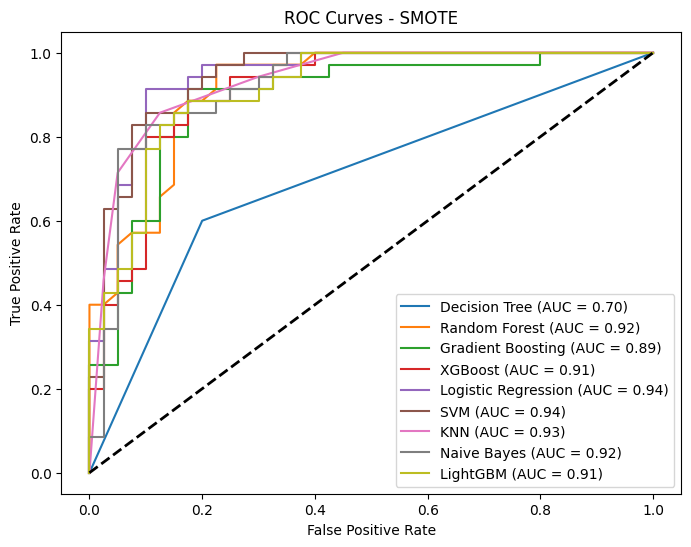

Skipping ANN due to error: 'History' object has no attribute 'decision_function'


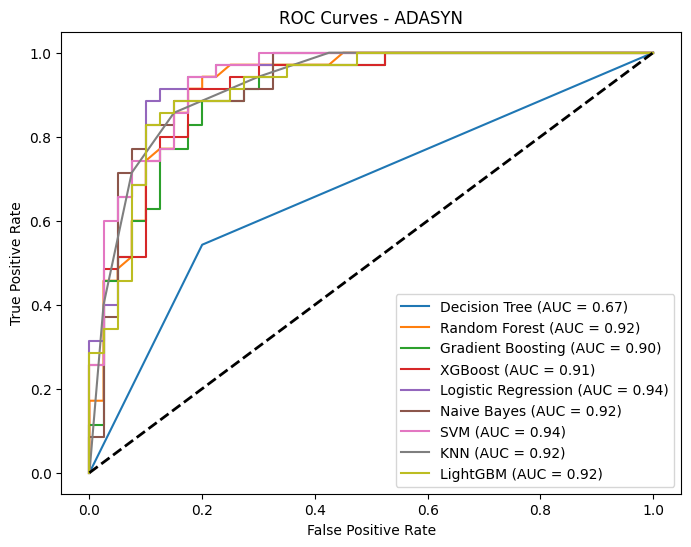

In [ ]:
# Plot the ROC curves of different models to compare their classification performance
'''A ROC curve (Receiver Operating Characteristic curve) is a graphical representation
used to evaluate the performance of binary classification models. It plots the true positive rate
(sensitivity) against the false positive rate (1 - specificity) at various threshold levels,
showing how well a model can distinguish between two classes. '''

def plot_roc_curves(models, X_test, y_test, title):
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_curve, auc

    plt.figure(figsize=(8, 6))

    for name, model in models.items():
        # If model is stored inside a dict, get the actual estimator
        if isinstance(model, dict) and 'model' in model:
            model = model['model']

        try:
            if hasattr(model, "predict_proba"):
                y_proba = model.predict_proba(X_test)[:, 1]
            else:
                y_proba = model.decision_function(X_test)

            fpr, tpr, _ = roc_curve(y_test, y_proba)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
        except Exception as e:
            print(f"Skipping {name} due to error: {e}")

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curves(models_smote, X_test, y_test, "ROC Curves - SMOTE")
plot_roc_curves(models_ada, X_test, y_test, "ROC Curves - ADASYN")

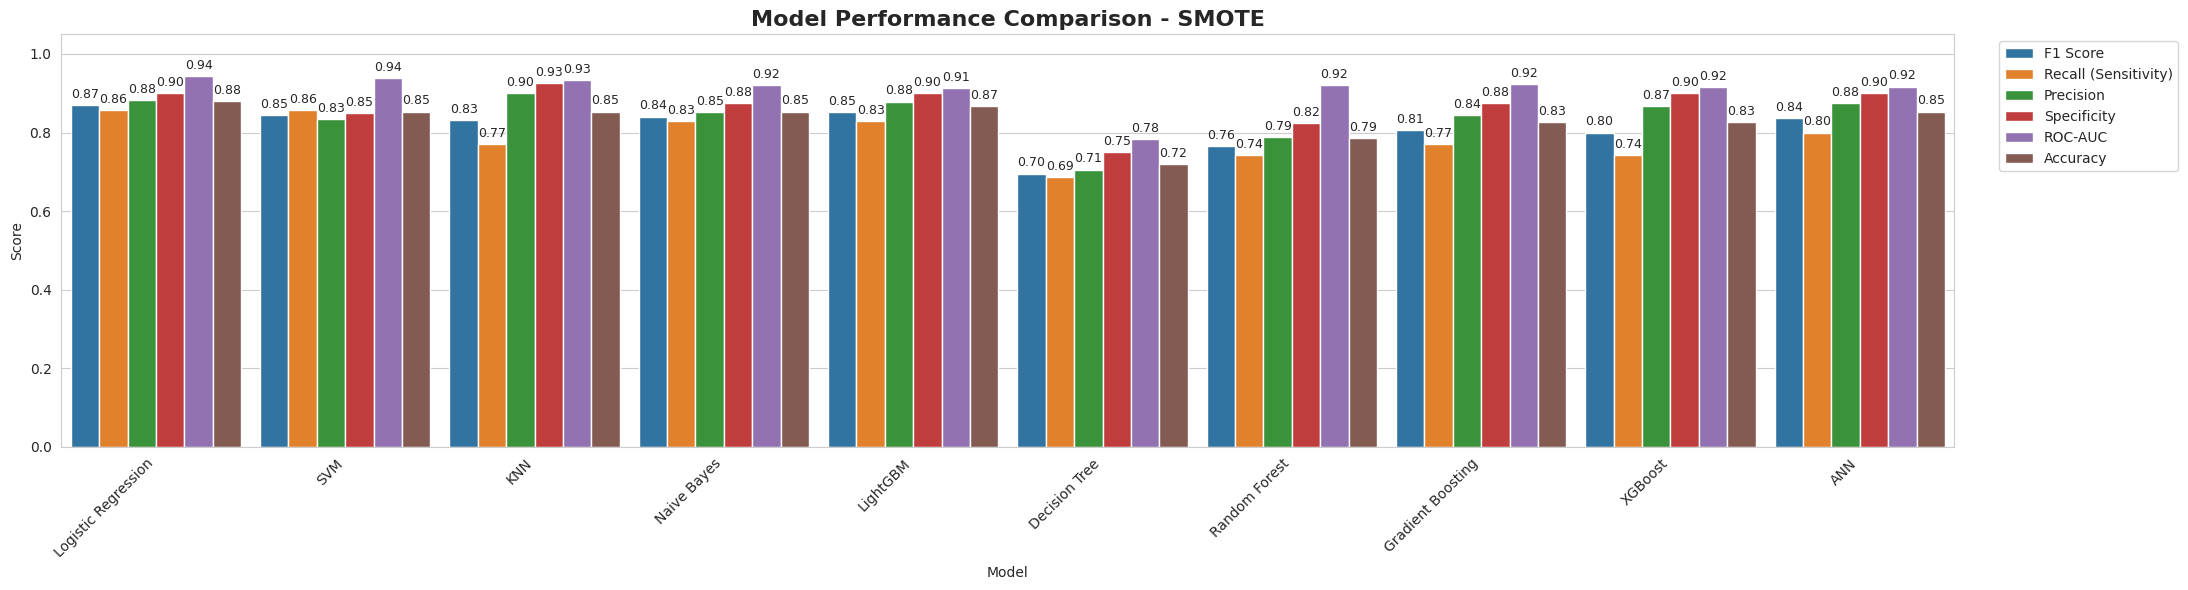

In [ ]:
# Plot to visualize the different metrices for different models trained on data balanced on smote
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics to plot
metrics_to_plot = [
    'F1 Score', 'Recall (Sensitivity)', 'Precision',
    'Specificity', 'ROC-AUC', 'Accuracy'
]

# Melt the dataframe
results_melted_smote = results_smote.melt(
    id_vars="Model",
    value_vars=metrics_to_plot,
    var_name="Metric",
    value_name="Score"
)

# Plot
plt.figure(figsize=(22, 6))  # Wider plot
sns.set_style("whitegrid")

ax = sns.barplot(
    data=results_melted_smote,
    x="Model",
    y="Score",
    hue="Metric",
    dodge=True,
    width=0.9
)

# Add value labels with 2 decimal places for all metrics
for container in ax.containers:
    ax.bar_label(container, labels=[f"{bar.get_height():.2f}" for bar in container], padding=3, fontsize=9)

# Formatting
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1.05)
plt.title("Model Performance Comparison - SMOTE", fontsize=16, weight = 'bold')
plt.ylabel("Score")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.subplots_adjust(left=0.05, right=0.95)
plt.tight_layout()
plt.show()

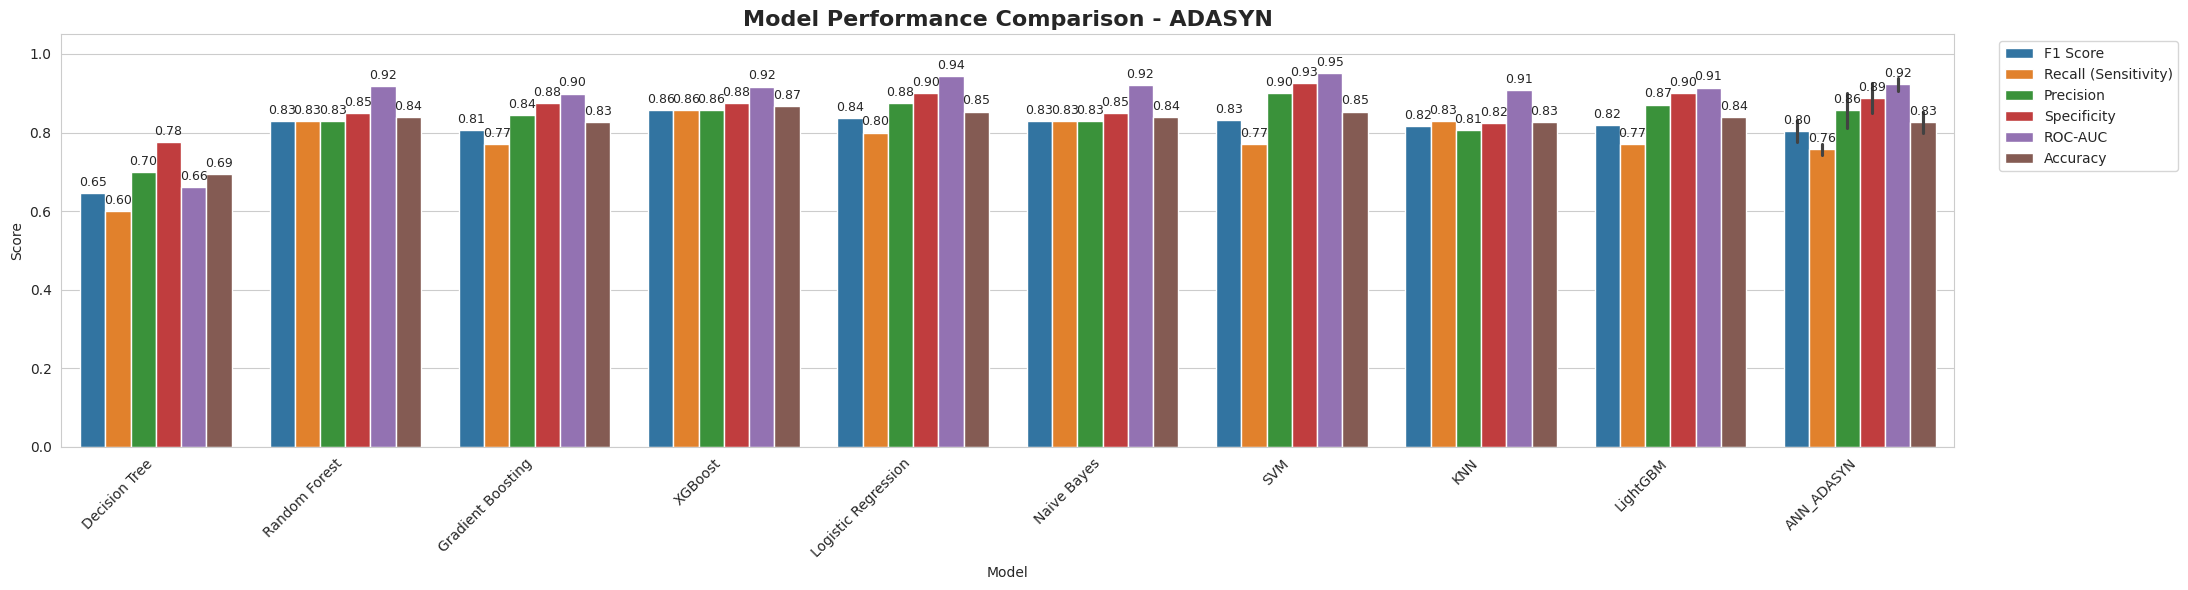

In [ ]:
# Plot to visualize the different metrices for different models trained on data balanced on adasyn
# metrics to plot
metrics_to_plot = [
    'F1 Score', 'Recall (Sensitivity)', 'Precision',
    'Specificity', 'ROC-AUC', 'Accuracy'
]

# Melt the dataframe
results_melted_ada = result_ada.melt(
    id_vars="Model",
    value_vars=metrics_to_plot,
    var_name="Metric",
    value_name="Score"
)

# Plot
plt.figure(figsize=(22, 6))
sns.set_style("whitegrid")

ax = sns.barplot(
    data=results_melted_ada,
    x="Model",
    y="Score",
    hue="Metric",
    dodge=True
)

# Add value labels with 2 decimal places for all metrics
for container in ax.containers:
    ax.bar_label(container, labels=[f"{bar.get_height():.2f}" for bar in container], padding=3, fontsize=9)

# Formatting
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1.05)
plt.title("Model Performance Comparison - ADASYN", fontsize=16, weight = 'bold')
plt.ylabel("Score")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.subplots_adjust(left=0.05, right=0.95)
plt.tight_layout()
plt.show()

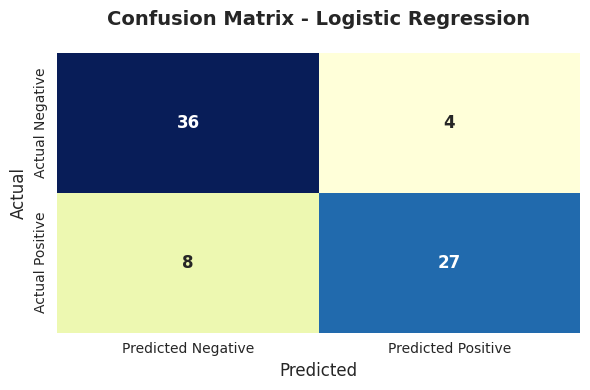

In [ ]:
# Confusion Matrix:
# tn: True Negatives – correctly predicted as no heart disease
# fp: False Positives – predicted as heart disease but actually healthy
# fn: False Negatives – predicted as healthy but actually have heart disease
# tp: True Positives – correctly predicted as having heart disease

# Specificity = tn / (tn + fp): ability to correctly identify healthy cases
# Sensitivity (Recall) = tp / (tp + fn): ability to correctly detect disease cases
from sklearn.metrics import confusion_matrix

# confusion matrix for the best model(Logistic Regression)
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"],
            annot_kws={"size": 12, "weight": "bold"})

plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix - Logistic Regression", fontsize=14, weight='bold', pad = 20)
plt.tight_layout()
plt.show()